In [78]:
import numpy as np
import pandas as pd
import os


In [79]:
df=pd.read_csv('ITC.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head(10)



C:\Users\asher\AppData\Local\Temp\ipykernel_29304\3884709266.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv('ITC.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN
2000-01-10,ITC,EQ,847.05,911.15,914.85,875.0,914.85,914.85,907.23,1219818,1.106653e+14,NaN,NaN,NaN
2000-01-11,ITC,EQ,914.85,902.00,952.00,866.1,877.00,883.70,908.61,2376154,2.159008e+14,NaN,NaN,NaN
2000-01-12,ITC,EQ,883.70,905.00,924.00,870.3,895.00,888.35,891.48,616366,5.494754e+13,NaN,NaN,NaN
2000-01-13,ITC,EQ,888.35,900.00,936.00,871.0,876.95,879.75,908.42,667073,6.059844e+13,NaN,NaN,NaN


<Axes: xlabel='Date'>

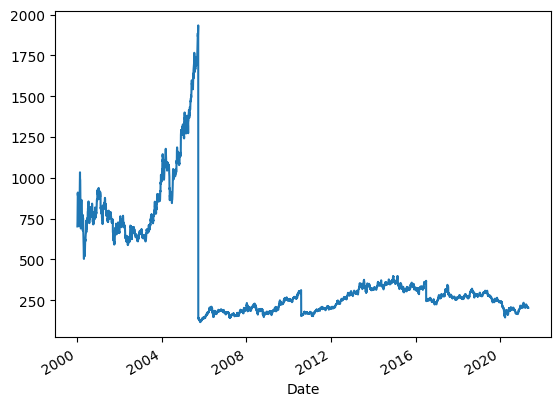

In [80]:
df['VWAP'].plot()

In [81]:
pred_var = pd.DataFrame(df['VWAP'])
features = ['Volume','Open', 'Low', 'High']

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transfrom = pd.DataFrame(columns = features, data = feature_transform, index = df.index )




In [83]:
from sklearn.model_selection import TimeSeriesSplit
timesplit = TimeSeriesSplit(n_splits = 10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = pred_var[:len(train_index)].values.ravel(), pred_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [84]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


In [85]:
import tensorflow as tf
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
tf.keras.utils.plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [86]:
train_metrics=lstm.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, shuffle=False,validation_data=(X_test, y_test))

Epoch 1/100
483/483 [==============================] - 1s 1ms/step - loss: 307517.0625 - mse: 307517.0625 - val_loss: 46379.1602 - val_mse: 46379.1602
Epoch 2/100
483/483 [==============================] - 1s 1ms/step - loss: 296183.4688 - mse: 296183.4688 - val_loss: 40869.6289 - val_mse: 40869.6289
Epoch 3/100
483/483 [==============================] - 1s 1ms/step - loss: 275097.4688 - mse: 275097.4688 - val_loss: 32056.1328 - val_mse: 32056.1328
Epoch 4/100
483/483 [==============================] - 1s 1ms/step - loss: 246330.9375 - mse: 246330.9375 - val_loss: 22137.1934 - val_mse: 22137.1934
Epoch 5/100
483/483 [==============================] - 0s 984us/step - loss: 214504.8750 - mse: 214504.8750 - val_loss: 13231.9648 - val_mse: 13231.9648
Epoch 6/100
483/483 [==============================] - 1s 1ms/step - loss: 182863.2500 - mse: 182863.2500 - val_loss: 6593.6611 - val_mse: 6593.6611
Epoch 7/100
483/483 [==============================] - 1s 1ms/step - loss: 153427.7500 - mse: 

In [87]:
history_df = pd.DataFrame(train_metrics.history)
history_df

,loss,mse,val_loss,val_mse
0,307517.062500,307517.062500,46379.160156,46379.160156
1,296183.468750,296183.468750,40869.628906,40869.628906
2,275097.468750,275097.468750,32056.132812,32056.132812
3,246330.937500,246330.937500,22137.193359,22137.193359
4,214504.875000,214504.875000,13231.964844,13231.964844
...,...,...,...,...
95,29.376740,29.376740,6.572503,6.572503
96,29.020882,29.020882,6.390165,6.390165
97,28.697165,28.697165,6.282283,6.282283
98,28.402357,28.402357,6.237290,6.237290


In [88]:
y_pred= lstm.predict(X_test)


16/16 [==============================] - 0s 773us/step


In [89]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.244354584218001


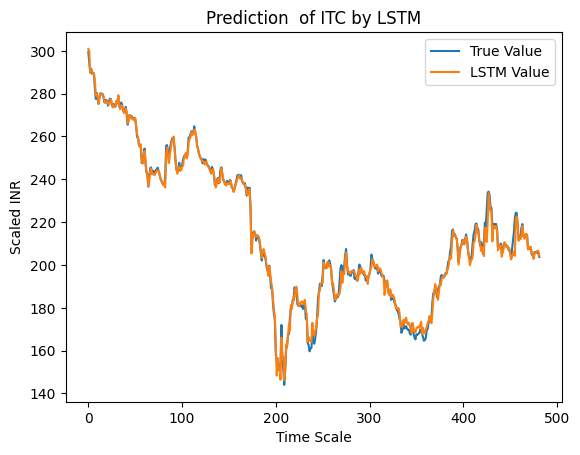

In [90]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction  of ITC by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled INR')
plt.legend()
plt.show()
